In [32]:
#importing libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import matplotlib.dates as mdates
from nltk.stem import *
from wordcloud import WordCloud

In [33]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
!ls "/content/drive/My Drive/WiDS"

'Sentiment Analysis Dataset 2.csv'


In [35]:
df = pd.read_csv('/content/drive/My Drive/WiDS/Sentiment Analysis Dataset 2.csv',skiprows=[8835,535881])


In [37]:
df.isnull().sum()

ItemID             0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64

In [38]:
df.drop('ItemID', axis=1, inplace=True)

In [39]:
df.drop('SentimentSource', axis=1, inplace=True)

In [40]:
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
#DATA CLEANING

# Remove pattern function
def remove_pattern(input_txt, pattern):
  r = re.findall(pattern, input_txt)
  for i in r:
    input_txt = re.sub(i, '', input_txt)
  return input_txt

# Remove Twitter Handles
df['Clean_TweetText'] = np.vectorize(remove_pattern)(df['SentimentText'], "@[\w]*")
df.head()

#remove links
df['Clean_TweetText'] = df['Clean_TweetText'].str.replace(r"http\S+", "")

#remove punctuation marks, numbers and special characters
df['Clean_TweetText'] = df['Clean_TweetText'].str.replace("[^a-zA-Z]", " ")

#remove stop words
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

df['Clean_TweetText']= df['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentiment,SentimentText,Clean_TweetText
0,0,is so sad for my APL frie...,sad apl friend
1,0,I missed the New Moon trail...,missed new moon trailer
2,1,omg its already 7:30 :O,omg already
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...
4,0,i think mi bf is cheating on me!!! ...,think mi bf cheating


In [43]:
type(df)

pandas.core.frame.DataFrame

In [44]:
df.head()

,Sentiment,SentimentText,Clean_TweetText
0,0,is so sad for my APL frie...,sad apl friend
1,0,I missed the New Moon trail...,missed new moon trailer
2,1,omg its already 7:30 :O,omg already
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...
4,0,i think mi bf is cheating on me!!! ...,think mi bf cheating


In [45]:
#text tokenization & normalization
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: x.split())
df.head()

,Sentiment,SentimentText,Clean_TweetText
0,0,is so sad for my APL frie...,"[sad, apl, friend]"
1,0,I missed the New Moon trail...,"[missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,"[omg, already]"
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,"[omgaga, im, sooo, im, gunna, cry, dentist, si..."
4,0,i think mi bf is cheating on me!!! ...,"[think, mi, bf, cheating]"


In [46]:
#lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: [lemmatizer.lemmatize(i) for i in x])
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Sentiment,SentimentText,Clean_TweetText
0,0,is so sad for my APL frie...,"[sad, apl, friend]"
1,0,I missed the New Moon trail...,"[missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,"[omg, already]"
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,"[omgaga, im, sooo, im, gunna, cry, dentist, si..."
4,0,i think mi bf is cheating on me!!! ...,"[think, mi, bf, cheating]"


In [47]:
p_df=df.copy()

In [48]:
p_df.head()

,Sentiment,SentimentText,Clean_TweetText
0,0,is so sad for my APL frie...,"[sad, apl, friend]"
1,0,I missed the New Moon trail...,"[missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,"[omg, already]"
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,"[omgaga, im, sooo, im, gunna, cry, dentist, si..."
4,0,i think mi bf is cheating on me!!! ...,"[think, mi, bf, cheating]"


In [49]:
n_df=df.copy()

In [50]:
n_df.head()

,Sentiment,SentimentText,Clean_TweetText
0,0,is so sad for my APL frie...,"[sad, apl, friend]"
1,0,I missed the New Moon trail...,"[missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,"[omg, already]"
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,"[omgaga, im, sooo, im, gunna, cry, dentist, si..."
4,0,i think mi bf is cheating on me!!! ...,"[think, mi, bf, cheating]"


In [51]:
p_df= p_df[p_df.Sentiment == 1]

In [52]:
n_df= n_df[n_df.Sentiment == 0]

In [53]:
p_df['Length']=p_df['Clean_TweetText'].apply(lambda x: len(x))

In [54]:
n_df['Length']=n_df['Clean_TweetText'].apply(lambda x: len(x))

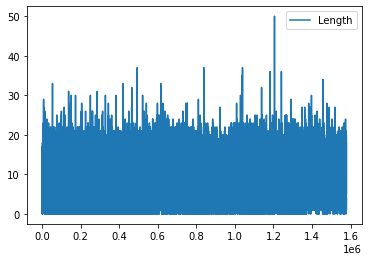

In [55]:
p_df.plot(y='Length')

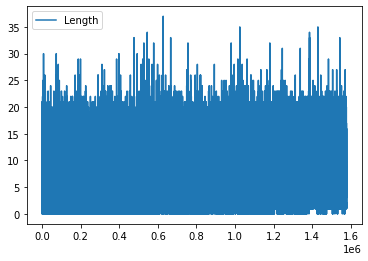

In [56]:
n_df.plot(y='Length')

In [57]:
p_df['Length'].max()

50

In [58]:
n_df['Length'].max()

37

In [59]:
#stitch tokens back together
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
df.head()

,Sentiment,SentimentText,Clean_TweetText
0,0,is so sad for my APL frie...,sad apl friend
1,0,I missed the New Moon trail...,missed new moon trailer
2,1,omg its already 7:30 :O,omg already
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry dentist since supo...
4,0,i think mi bf is cheating on me!!! ...,think mi bf cheating


In [60]:
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

,Sentiment,SentimentText,Clean_TweetText
0,0,is so sad for my APL frie...,friend
1,0,I missed the New Moon trail...,missed moon trailer
2,1,omg its already 7:30 :O,already
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna dentist since suposed crown
4,0,i think mi bf is cheating on me!!! ...,think cheating


In [61]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     |████████████████████████████████| 125 kB 5.6 MB/s 


In [62]:
# Calculate Polarity
analyser = SentimentIntensityAnalyzer()
scoresArray = []
for tweet in df['Clean_TweetText']:
  score = analyser.polarity_scores(tweet)
  scoresArray.append(score)

scores = pd.DataFrame.from_dict(scoresArray)

In [63]:
df = pd.merge(df, scores, right_index=True, left_index=True)
df.head()

,Sentiment,SentimentText,Clean_TweetText,neg,neu,pos,compound
0,0,is so sad for my APL frie...,friend,0.000,0.000,1.0,0.4939
1,0,I missed the New Moon trail...,missed moon trailer,0.524,0.476,0.0,-0.2960
2,1,omg its already 7:30 :O,already,0.000,1.000,0.0,0.0000
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna dentist since suposed crown,0.000,1.000,0.0,0.0000
4,0,i think mi bf is cheating on me!!! ...,think cheating,0.783,0.217,0.0,-0.5574


In [64]:
#filtering tweets to keep only those whose twint polarity and vader polarity matches
df = df[(((df.Sentiment == 0) & (df.compound < 0)) | ((df.Sentiment == 1) & (df.compound > 0)))]
df.head()
print(df.shape)

(735562, 7)


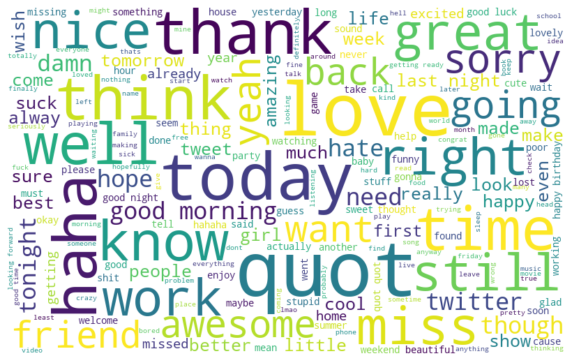

In [65]:
#Word Cloud Data visualization (ALL WORDS)
all_words = ' '.join([text for text in df['Clean_TweetText']])

from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, background_color='white', max_font_size=110).generate(all_words) 

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()


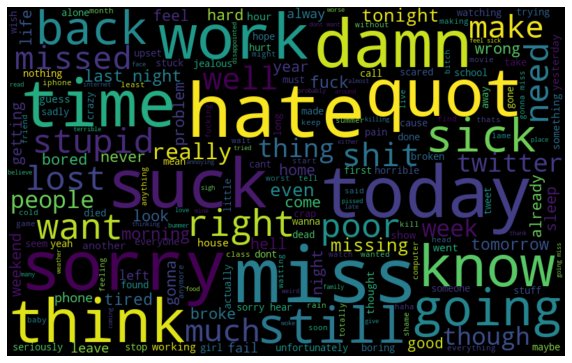

In [66]:
#Word Cloud Data Visualiztion (DEPRESSIVE WORDS)
depressive_words =' '.join([text for text in df['Clean_TweetText'][df['Sentiment'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(depressive_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

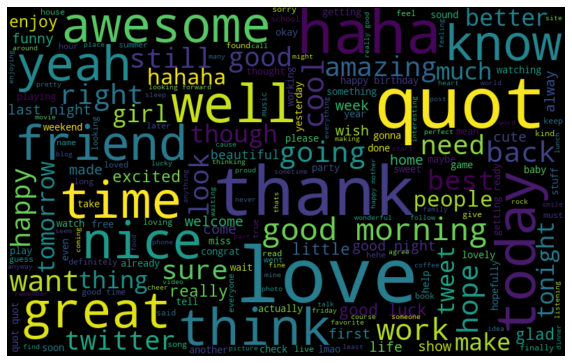

In [67]:
#Word Cloud Data Visualiztion (Happy words)
happy_words =' '.join([text for text in df['Clean_TweetText'][df['Sentiment'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(happy_words)

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [68]:
df.head()

,Sentiment,SentimentText,Clean_TweetText,neg,neu,pos,compound
1,0,I missed the New Moon trail...,missed moon trailer,0.524,0.476,0.000,-0.2960
4,0,i think mi bf is cheating on me!!! ...,think cheating,0.783,0.217,0.000,-0.5574
5,0,or i just worry too much?,worry much,0.744,0.256,0.000,-0.4404
9,1,hmmmm.... i wonder how she my number @-),hmmmm wonder number,0.000,0.606,0.394,0.0772
11,1,thanks to all the haters up in my face a...,thanks hater face,0.418,0.149,0.433,0.0258


In [69]:
df.drop(['SentimentText','neg','neu','pos','compound'],axis = 1,inplace = True)
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: x.split())
df.head()

,Sentiment,Clean_TweetText
1,0,"[missed, moon, trailer]"
4,0,"[think, cheating]"
5,0,"[worry, much]"
9,1,"[hmmmm, wonder, number]"
11,1,"[thanks, hater, face]"


In [70]:
!pip install --upgrade gensim
import gensim
import multiprocessing

cores = multiprocessing.cpu_count()

w2v_model = gensim.models.Word2Vec(min_count=1, window=2, vector_size=300, alpha=0.03, min_alpha=0.0007, workers=cores-1)
w2v_model.build_vocab(df['Clean_TweetText'], progress_per=10000)

w2v_model.train(df['Clean_TweetText'], epochs=10, total_examples=len(df['Clean_TweetText']))

     |████████████████████████████████| 24.1 MB 1.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


(40878172, 44509340)

In [71]:
w2v_model.wv.most_similar("proud")

[('nymphomanic', 0.4810493290424347),
 ('sspca', 0.4462149441242218),
 ('happy', 0.4410698711872101),
 ('congrats', 0.4356258511543274),
 ('stirlkbg', 0.42636197805404663),
 ('beeasy', 0.4234595000743866),
 ('pleased', 0.42002204060554504),
 ('congratulation', 0.41879788041114807),
 ('honor', 0.4167594313621521),
 ('tswiftphilipines', 0.4166743755340576)]

In [72]:
vocab=w2v_model.wv.key_to_index
print("The total number of words are : ",len(vocab))

The total number of words are :  144266


In [73]:
word_vec_dict={}
for word in vocab:
  word_vec_dict[word]=w2v_model.wv.get_vector(word)
print("The no of key-value pairs : ", len(word_vec_dict))

The no of key-value pairs :  144266


In [74]:
from sklearn.model_selection import train_test_split

#keras
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [75]:
# maximum length of tweet
max_length = -1
for i, tweet in enumerate(df['Clean_TweetText']):
  if(len(tweet)>max_length):
    max_length=len(tweet)
print(max_length)

#stitch tokens back together
df['Clean_TweetText'] = df['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))

29


In [76]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Clean_TweetText'])
vocab_size = len(tokenizer.word_index) + 1
encoded_tweets = tokenizer.texts_to_sequences(df['Clean_TweetText'])
print(encoded_tweets[1])

[19, 3321]


In [77]:
max_length = max_length + 1  # max lenght of a token
vocab_size = len(tokenizer.word_index) + 1  # total no of words
embed_dim=300 # embedding dimension as choosen in word2vec constructor

In [78]:
padded_tweets= pad_sequences(encoded_tweets, maxlen=max_length, padding='post')
padded_tweets.shape

(735562, 30)

In [79]:
#embedding matrix
embed_matrix = np.zeros(shape=(vocab_size, embed_dim))
for word, i in tokenizer.word_index.items():
  embed_vector=word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [80]:
print(embed_matrix)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.06011212e-01 -6.07840657e-01  6.95524335e-01 ...  1.14828303e-01
   1.54362440e-01 -4.28842694e-01]
 [-6.78069830e-01 -8.77789930e-02 -4.37351108e-01 ... -4.43295032e-01
  -1.89406052e-01 -2.80327588e-01]
 ...
 [-2.17048422e-04 -2.13180203e-03 -1.99290868e-02 ... -3.10581480e-03
  -1.08157052e-02 -1.27642695e-02]
 [ 1.43317238e-03  1.42435534e-02 -7.93619826e-03 ... -1.73840281e-02
  -1.92317124e-02 -7.68197281e-03]
 [ 1.24557111e-02  1.69866942e-02 -2.22953572e-03 ... -3.93943712e-02
   2.42895372e-02 -6.29157014e-03]]


In [81]:
#split test and train data
Y = df[['Sentiment']].to_numpy()

x_train, x_test, y_train, y_test=train_test_split(padded_tweets, Y, test_size=0.20, random_state=7)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (588449, 30)
x_test shape: (147113, 30)
y_train shape: (588449, 1)
y_test shape: (147113, 1)


In [82]:
#LSTM MODEL

import tensorflow as tf
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          embed_dim,
                                          weights = [embed_matrix],
                                          input_length = max_length,
                                          trainable=False)

sequence_input = Input(shape=(max_length,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = LSTM(64, dropout=0.2, recurrent_dropout=0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
lstm_model = tf.keras.Model(sequence_input, outputs)

lstm_model.summary()
lstm_model.compile(optimizer=Adam(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 embedding (Embedding)       (None, 30, 300)           43280100  
                                                                 
 spatial_dropout1d (SpatialD  (None, 30, 300)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                93440     
                                                                 
 dense (Dense)               (None, 512)               33280     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                             

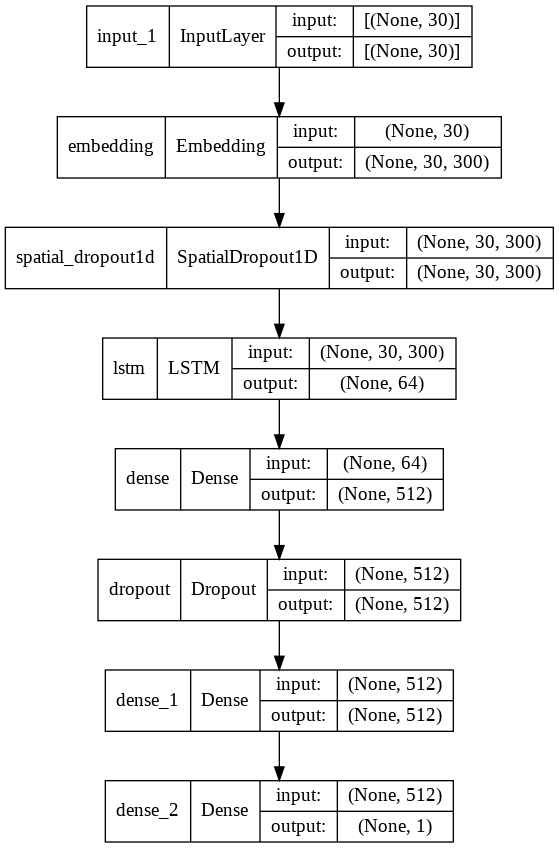

In [83]:
plot_model(lstm_model, to_file = 'model_plot_lstm.png', show_shapes = True, show_layer_names = True)

In [84]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")
history = lstm_model.fit(x_train, y_train, batch_size = 1024, epochs = 10, validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on CPU...
Epoch 1/10
575/575 [==============================] - 596s 1s/step - loss: 0.1580 - accuracy: 0.9357 - val_loss: 0.0882 - val_accuracy: 0.9660 - lr: 0.0010
Epoch 2/10
575/575 [==============================] - 620s 1s/step - loss: 0.0998 - accuracy: 0.9614 - val_loss: 0.0727 - val_accuracy: 0.9717 - lr: 0.0010
Epoch 3/10
575/575 [==============================] - 614s 1s/step - loss: 0.0857 - accuracy: 0.9671 - val_loss: 0.0652 - val_accuracy: 0.9751 - lr: 0.0010
Epoch 4/10
575/575 [==============================] - 602s 1s/step - loss: 0.0781 - accuracy: 0.9705 - val_loss: 0.0595 - val_accuracy: 0.9774 - lr: 0.0010
Epoch 5/10
575/575 [==============================] - 600s 1s/step - loss: 0.0733 - accuracy: 0.9720 - val_loss: 0.0576 - val_accuracy: 0.9781 - lr: 0.0010
Epoch 6/10
575/575 [==============================] - 600s 1s/step - loss: 0.0696 - accuracy: 0.9736 - val_loss: 0.0560 

In [85]:
from keras.models import load_model


In [86]:
lstm_model.save('my_model.h5')

In [87]:
lstm_model.save

<bound method Model.save of <keras.engine.functional.Functional object at 0x7f917c595410>>

In [88]:
model = load_model('my_model.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


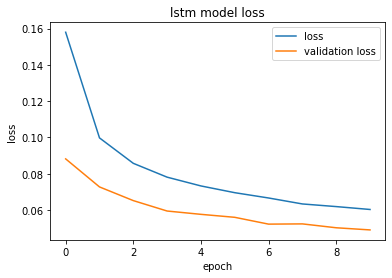

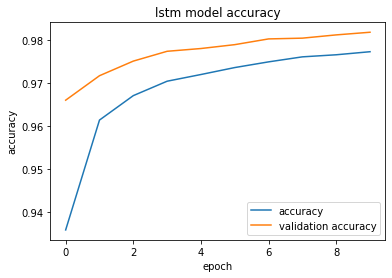

In [89]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('lstm model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('lstm model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'])
plt.show()

In [90]:
def decode_result(score):
    return 0 if score<0.5 else 1

scores = lstm_model.predict(x_test, verbose=1, batch_size=10000)
y_pred_lstm = [decode_result(score) for score in scores]

15/15 [==============================] - 35s 2s/step


In [91]:
dummy_tweet = tokenizer.texts_to_sequences('happy always know want data rescuing replaced')
dummy_tweet= pad_sequences(dummy_tweet, maxlen=max_length, padding='post')
dummy_tweet_prediction = lstm_model.predict(dummy_tweet)
if (dummy_tweet_prediction.any() < 0.5):
    print('Signs of depression present!')
else:
    print('Normal')

Normal


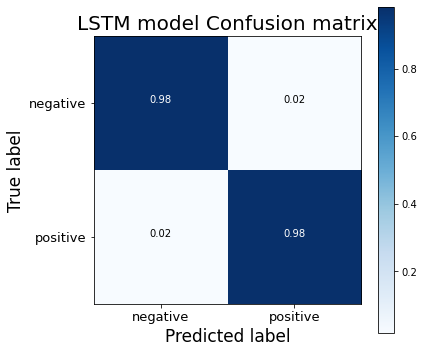

In [92]:
import itertools
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)


cnf_matrix = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=['negative', 'positive'], title="LSTM model Confusion matrix")
plt.show()


In [93]:
print(classification_report(list(y_test), y_pred_lstm))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     54170
           1       0.99      0.98      0.99     92943

    accuracy                           0.98    147113
   macro avg       0.98      0.98      0.98    147113
weighted avg       0.98      0.98      0.98    147113



In [113]:
import math
from numpy import sign


In [115]:
class LogReg:
    """
    Class to represent a logistic regression model.
    """

    def __init__(self, l_rate, epochs, n_features):
        """
        Create a new model with certain parameters.

        :param l_rate: Initial learning rate for model.
        :param epoch: Number of epochs to train for.
        :param n_features: Number of features.
        """
        self.l_rate = l_rate
        self.epochs = epochs
        self.coef = [0.0] * n_features
        self.bias = 0.0

    def sigmoid(self, score, threshold=20.0):
        """
        Prevent overflow of exp by capping activation at 20.

        :param score: A real valued number to convert into a number between 0 and 1
        """
        if abs(score) > threshold:
            score = threshold * sign(score)
        activation = math.exp(score)
        return activation / (1.0 + activation)

    def predict(self, features):
        """
        Given an example's features and the coefficients, predicts the class.

        :param features: List of real valued features for a single training example.

        :return: Returns the predicted class (either 0 or 1).
        """
        value = sum([features[i]*self.coef[i] for i in range(len(features))]) + self.bias
        return self.sigmoid(value)

    def sg_update(self, features, label):
        """
        Computes the update to the weights based on a predicted example.

        :param features: Features to train on.
        :param label: Corresponding label for features.
        """
        yhat = self.predict(features)
        e = label - yhat
        self.bias = self.bias + self.l_rate * e * yhat * (1-yhat)
        for i in range(len(features)):
            self.coef[i] = self.coef[i] + self.l_rate * e * yhat * (1-yhat) * features[i]
        return

    def train(self, X, y):
        """
        Computes logistic regression coefficients using stochastic gradient descent.

        :param X: Features to train on.
        :param y: Corresponding label for each set of features.

        :return: Returns a list of model weight coefficients where coef[0] is the bias.
        """
        for epoch in range(self.epochs):
            for features, label in zip(X, y):
                self.sg_update(features, label)
        return self.bias, self.coef

In [95]:
def get_accuracy(y_bar, y_pred):
    """
    Computes what percent of the total testing data the model classified correctly.

    :param y_bar: List of ground truth classes for each example.
    :param y_pred: List of model predicted class for each example.

    :return: Returns a real number between 0 and 1 for the model accuracy.
    """
    correct = 0
    for i in range(len(y_bar)):
        if y_bar[i] == y_pred[i]:
            correct += 1
    accuracy = (correct / len(y_bar)) * 100.0
    return accuracy

In [97]:
LEARNING_RATE = 0.1
EPOCHS= 10

In [116]:
# Logistic Model
logreg = LogReg(LEARNING_RATE, EPOCHS, len(x_train[0]))
bias_logreg, weights_logreg = logreg.train(x_train, y_train)
y_logistic = [round(logreg.predict(example)) for example in x_test]

In [118]:
# Compare accuracies
accuracy_logistic = get_accuracy(y_logistic, y_test)
print('Logistic Regression Accuracy: {:0.3f}'.format(accuracy_logistic))

Logistic Regression Accuracy: 42.863


In [ ]:
#CNN-LSTM MODEL
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Flatten

cnn_lstm_model= Sequential()
cnn_lstm_model.add(Embedding(vocab_size, embed_dim, input_length=max_length))
cnn_lstm_model.add(Conv1D(200, kernel_size=3, activation = "relu"))
cnn_lstm_model.add(LSTM(64, return_sequences=True))
cnn_lstm_model.add(Dropout(0.5))
cnn_lstm_model.add(LSTM(64))
cnn_lstm_model.add(Dense(50, activation='relu'))
cnn_lstm_model.add(Dense(50, activation='relu'))
cnn_lstm_model.add(Flatten())
#l2 regularizer
cnn_lstm_model.add(Dense(100,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
cnn_lstm_model.add(Dense(1, activation='sigmoid'))
#sgd= SGD(lr=0.0001,decay=1e-6,momentum=0.9,nesterov=True)
adam=Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)
cnn_lstm_model.summary()
cnn_lstm_model.compile(loss='binary_crossentropy', optimizer = adam, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 30, 300)           43280100  
                                                                 
 conv1d (Conv1D)             (None, 28, 200)           180200    
                                                                 
 lstm_1 (LSTM)               (None, 28, 64)            67840     
                                                                 
 dropout_1 (Dropout)         (None, 28, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_3 (Dense)             (None, 50)                3250      
                                                                 
 dense_4 (Dense)             (None, 50)                2

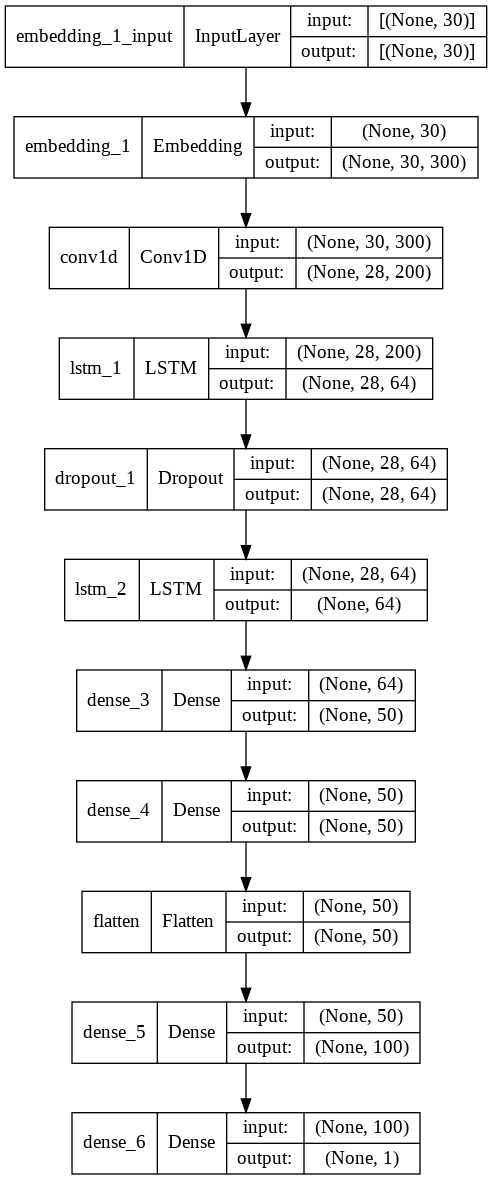

In [ ]:
plot_model(cnn_lstm_model, to_file = 'model_plot_cnn_lstm.png', show_shapes = True, show_layer_names = True)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")
cnn_lstm_history = cnn_lstm_model.fit(x_train, y_train, epochs=5, batch_size=512, validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Training on CPU...
Epoch 1/5
1150/1150 [==============================] - 1466s 1s/step - loss: 0.2119 - accuracy: 0.9376 - val_loss: 0.0395 - val_accuracy: 0.9856 - lr: 5.0000e-04
Epoch 2/5
1150/1150 [==============================] - 1477s 1s/step - loss: 0.0229 - accuracy: 0.9921 - val_loss: 0.0306 - val_accuracy: 0.9895 - lr: 5.0000e-04
Epoch 3/5
1150/1150 [==============================] - 1468s 1s/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0279 - val_accuracy: 0.9904 - lr: 5.0000e-04
Epoch 4/5
1150/1150 [==============================] - 1473s 1s/step - loss: 0.0078 - accuracy: 0.9976 - val_loss: 0.0318 - val_accuracy: 0.9911 - lr: 5.0000e-04
Epoch 5/5
1150/1150 [==============================] - 1467s 1s/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0338 - val_accuracy: 0.9898 - lr: 5.0000e-04


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


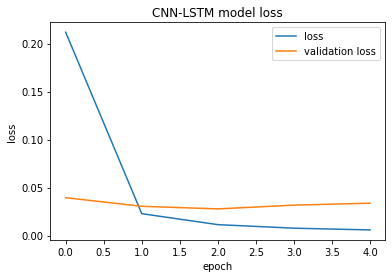

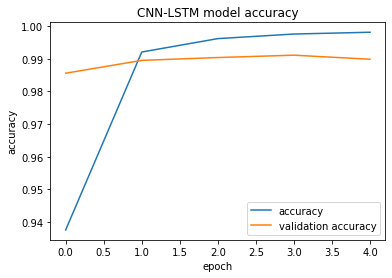

In [ ]:
print(cnn_lstm_history.history.keys())
loss = cnn_lstm_history.history['loss']
val_loss = cnn_lstm_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('CNN-LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'])
plt.show()

accuracy = cnn_lstm_history.history['accuracy']
val_accuracy= cnn_lstm_history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('CNN-LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'])
plt.show()

In [ ]:
scores = cnn_lstm_model.predict(x_test, verbose=1, batch_size=10000)
y_pred_cnn_lstm = [decode_result(score) for score in scores]

15/15 [==============================] - 58s 4s/step


In [ ]:
dummy_tweet = tokenizer.texts_to_sequences('I suffer from anxiety and feel low all the time')
dummy_tweet= pad_sequences(dummy_tweet, maxlen=max_length, padding='post')
dummy_tweet_prediction = cnn_lstm_model.predict(dummy_tweet)
if (dummy_tweet_prediction.any() < 0.5):
    print('Signs of depression present!')
else:
    print('Normal')

Normal


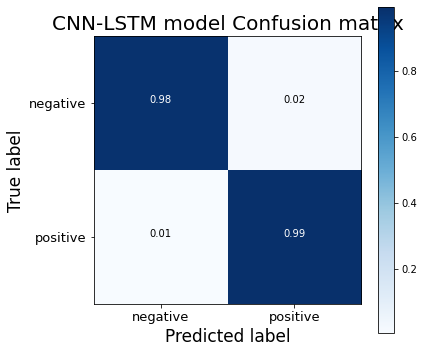

In [ ]:
#evaluation

cnn_lstm_cnf_matrix = confusion_matrix(y_test, y_pred_cnn_lstm)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnn_lstm_cnf_matrix, classes=['negative', 'positive'], title="CNN-LSTM model Confusion matrix")
plt.show()